In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


In [201]:
data = pd.read_csv("Papa.csv")

In [ ]:
# valor por ehctare
data["VPH"] = data.produccion*data.precio # esta en toneladasa
# indice de vegetacion realtiva
data["IRV"] = np.where(
    data["sembrada"] == 0,
    0,   # valor cuando no se puede dividir
    data["cosechada"] / data["sembrada"]
)

In [203]:
data = data.drop(columns=["d-m-y"]).groupby(by="Región", as_index=False).mean()

In [204]:
data

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV
0,Amazonas,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1.984234
1,Apurímac,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,53.731249
2,Arequipa,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1.520460
3,Ayacucho,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,155.275953
4,Cajamarca,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,1.452955
5,Callao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cusco,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,34.197308
7,Huancavelica,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,10.303935
8,Huánuco,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,2.290285
9,Ica,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,54.491636


In [205]:
data = data[data.Región!="Nacional"].reset_index(level=0, drop=True)

In [206]:
data

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV
0,Amazonas,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1.984234
1,Apurímac,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,53.731249
2,Arequipa,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1.520460
3,Ayacucho,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,155.275953
4,Cajamarca,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,1.452955
5,Callao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cusco,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,34.197308
7,Huancavelica,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,10.303935
8,Huánuco,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,2.290285
9,Ica,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,54.491636


In [207]:
X = data[[col for col in data.columns if col != "Región"]]
#X = data

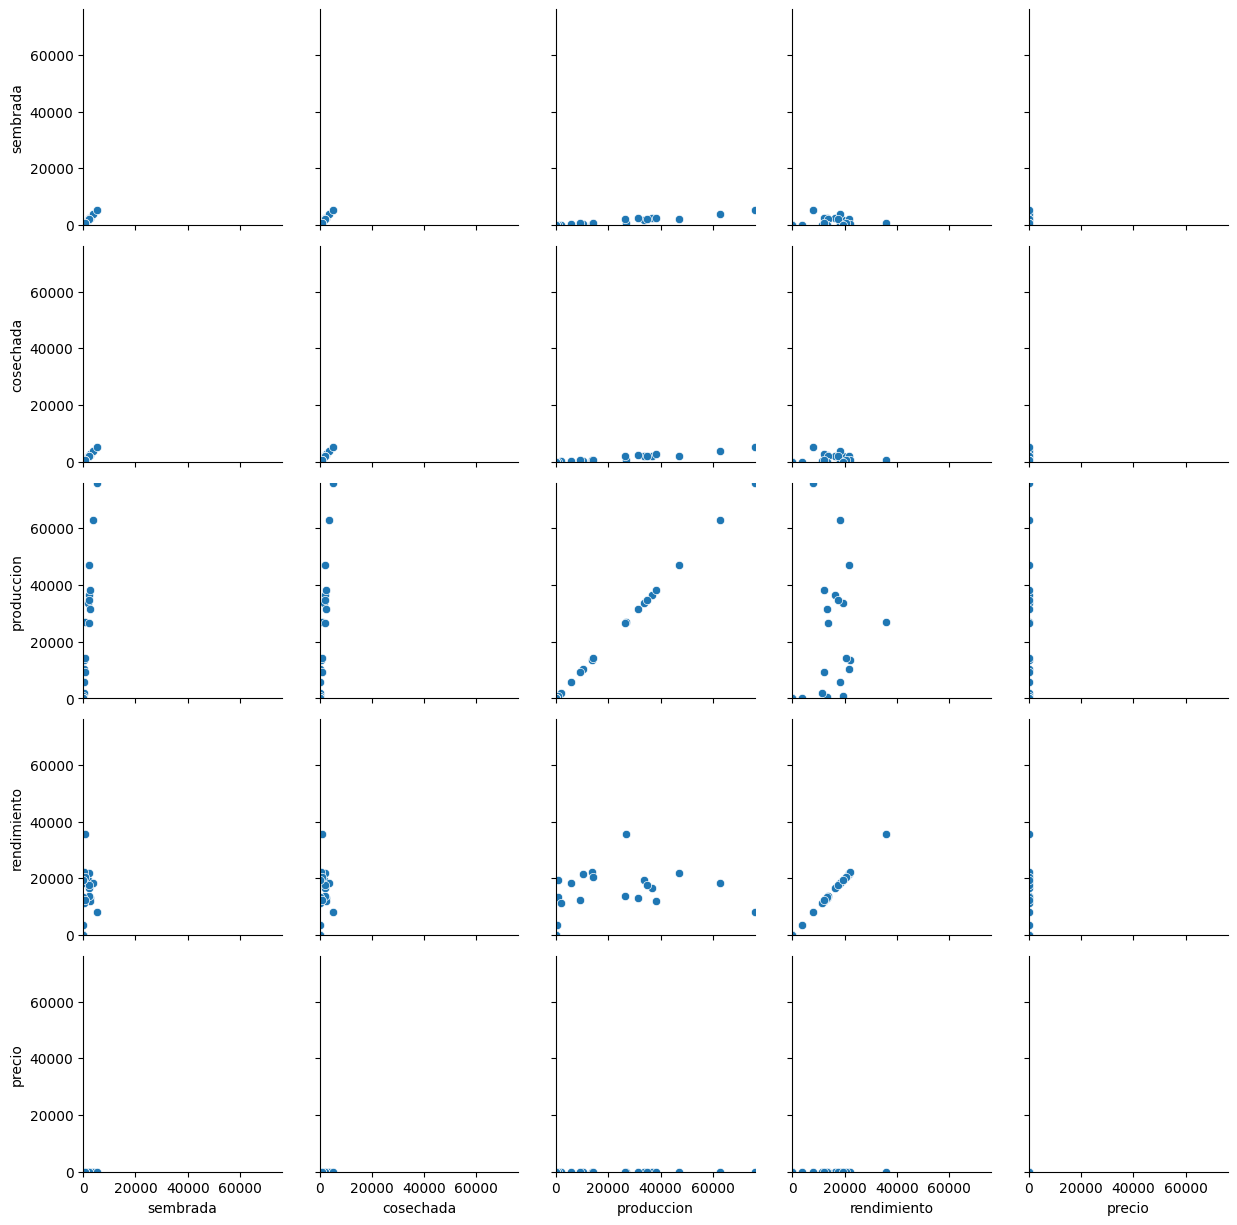

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(X)
g.map(sns.scatterplot)

# Compute global min/max from all features
xmin, xmax = X.min().min(), X.max().max()
ymin, ymax = X.min().min(), X.max().max()

# Apply same scale to all axes
for ax in g.axes.flatten():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

plt.show()


In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
])
pipeline.fit(X=X)


,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [209]:
import joblib
joblib.dump(pipeline, "transform_pipeline.pkl")
# import joblib
#pipeline = joblib.load("transform_pipeline.pkl")
# new_data_transformed = pipeline.transform(new_data)


['transform_pipeline.pkl']

In [210]:
X = pipeline.transform(X)

In [212]:
data.columns

Index(['Región', 'sembrada', 'cosechada', 'produccion', 'rendimiento',
       'precio', 'VPH', 'IRV'],
      dtype='object')

In [213]:
df = pd.DataFrame(X,columns=['sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'IRV'])

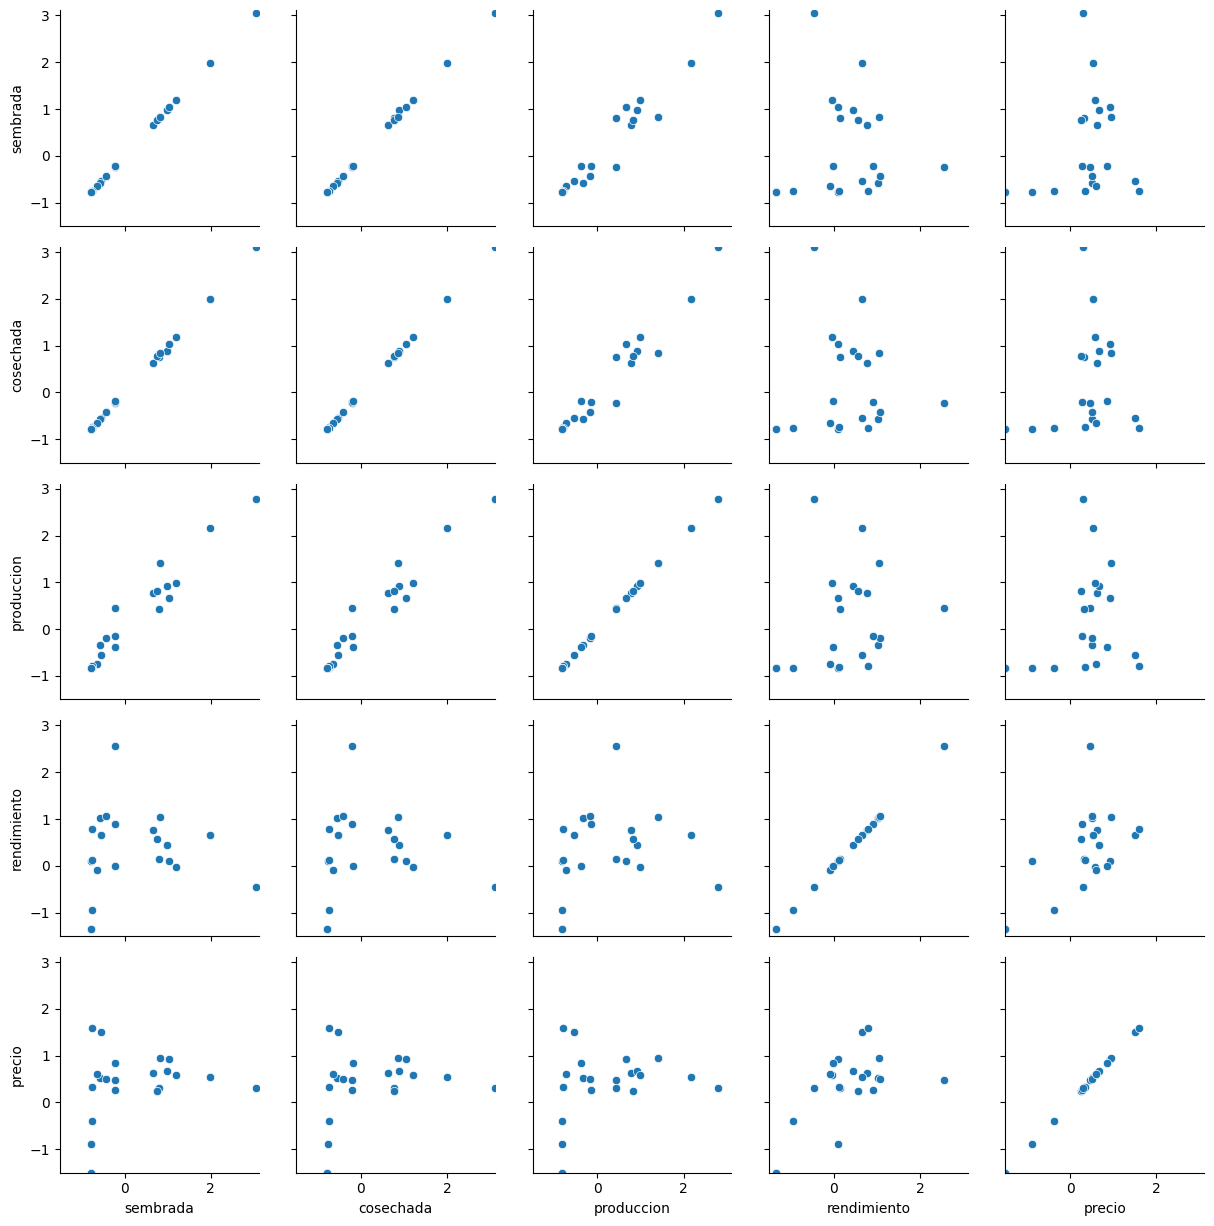

In [161]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# Compute global min/max from all features
xmin, xmax = df.min().min(), df.max().max()
ymin, ymax = df.min().min(), df.max().max()

# Apply same scale to all axes
for ax in g.axes.flatten():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

plt.show()

In [214]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [215]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(Z=linkage_matrix, labels= data["Región"].tolist(), orientation="right", **kwargs)


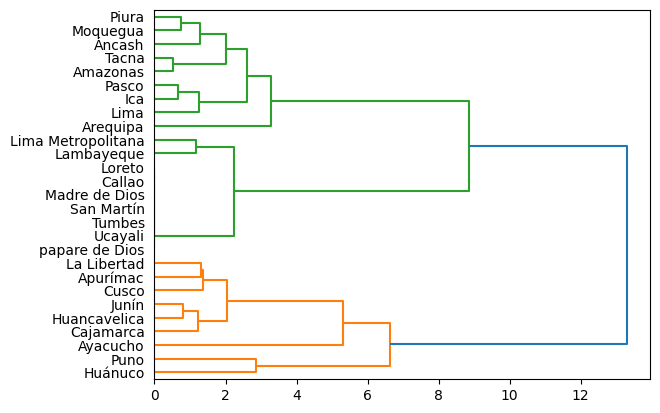

In [216]:
plot_dendrogram(model)

In [218]:
model = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=8,       # number of clusters to form
    metric='euclidean',  # distance measure
    linkage='ward'       # ward, complete, average, single
)

labels = model.fit_predict(X)

In [296]:
data["Cluster"] = model.labels_

In [291]:
data

,NOMBDEP,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV,Cluster,gm
0,AMAZONAS,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1.984234,1,2
1,APURIMAC,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,53.731249,0,1
2,AREQUIPA,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1.520460,1,2
3,AYACUCHO,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,155.275953,0,1
4,CAJAMARCA,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,1.452955,0,1
5,CALLAO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
6,CUSCO,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,34.197308,0,1
7,HUANCAVELICA,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,10.303935,0,1
8,HUANUCO,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,2.290285,0,1
9,ICA,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,54.491636,1,2


In [221]:
colors_hex = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # olive
    "#17becf"   # cyan
]

In [222]:
df["Cluster"] = model.labels_

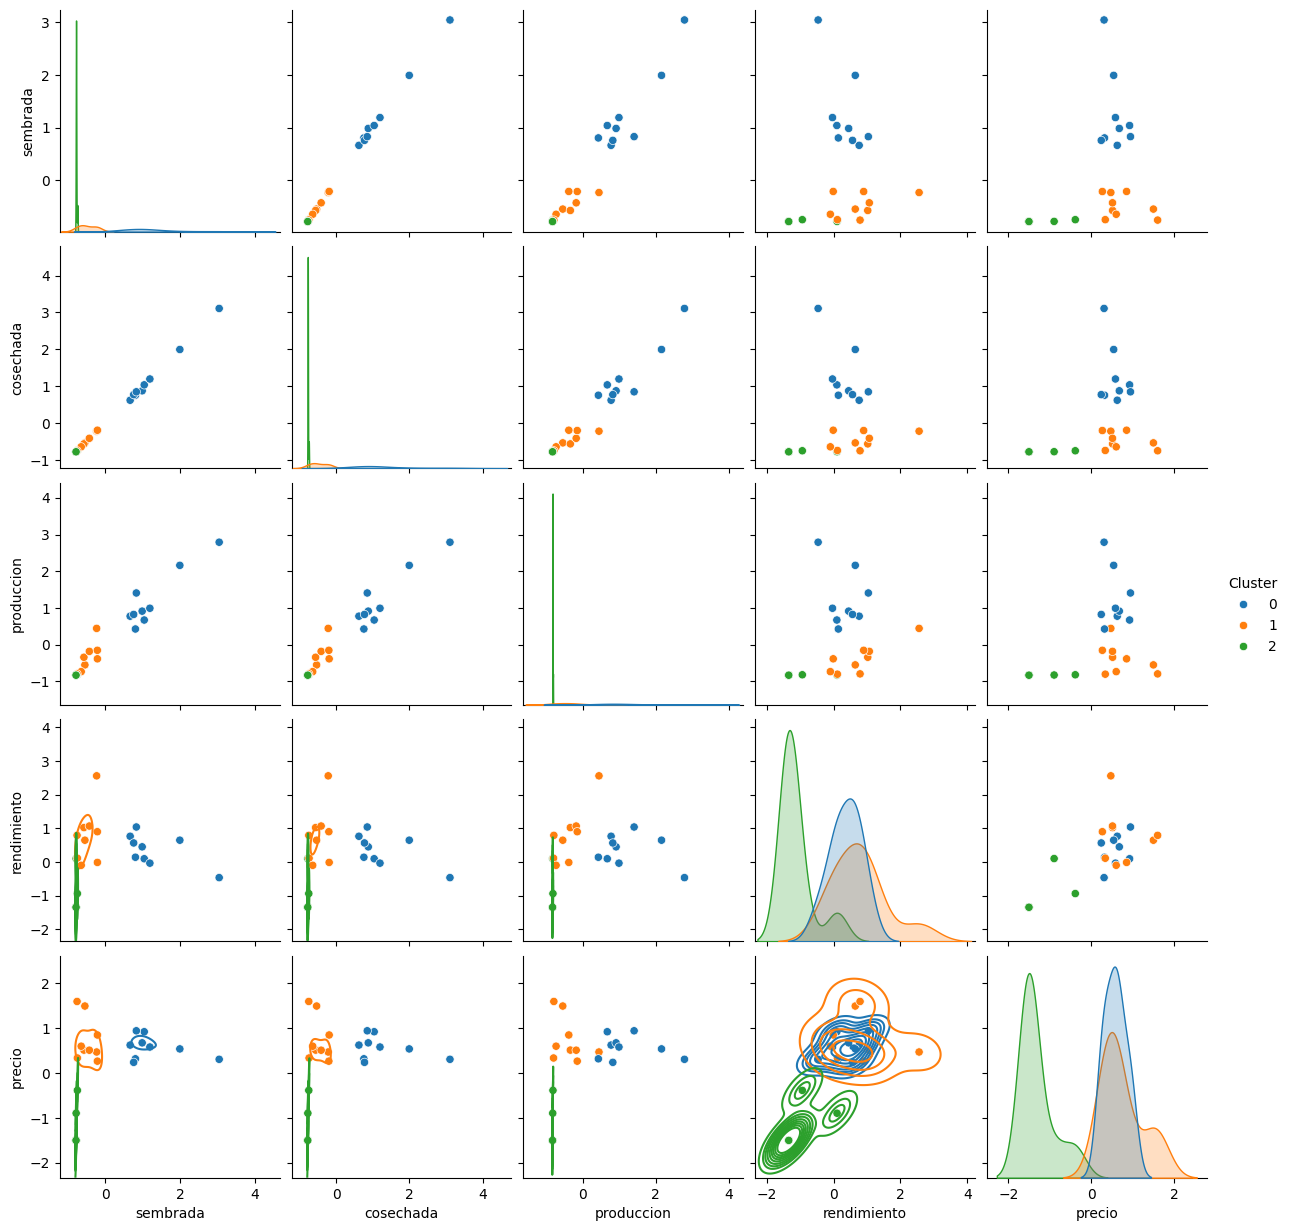

In [196]:
g = sns.pairplot(data=df[[col for col in data.columns if col not in ["Región"]]],
             hue="Cluster",
             palette={0: "#1f77b4",   1: "#ff7f0e",  2:  "#2ca02c"},
             diag_kind="kde"
             )
g.map_lower(sns.kdeplot)

In [2]:
import geopandas

In [269]:
gdf = geopandas.read_file("./limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp")

In [224]:
gdf.head(2)

,OBJECTID,CCDD,NOMBDEP,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
0,1.0,01,AMAZONAS,INEI - CPV RESULTADOS,None,426806.0,417365.0,289648.0,69.4,239212.0,...,2139.0,3.184694e+05,3.745422e+05,5094318.10,34164.0,0.022988,0.000013,12.894071,3.203362,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2.0,02,ANCASH,INEI - CPV RESULTADOS,None,1180638.0,1139115.0,850842.0,74.7,701614.0,...,9366.0,2.252303e+06,1.363318e+06,34431748.77,74385.0,0.000000,0.000000,11.640227,2.954639,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."


In [225]:
gdf.NOMBDEP.shape

(25,)

In [227]:
data.Región.shape

(27,)

In [228]:
import unicodedata
def remove_tildes(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [235]:
data["Región"] =  data["Región"].apply(remove_tildes).str.upper().str.strip()

In [236]:
gdf["NOMBDEP"] =  gdf["NOMBDEP"].apply(remove_tildes).str.strip()

In [237]:
missing = data[~data["Región"].isin(gdf["NOMBDEP"])]

print(missing["Región"].unique())


['LIMA METROPOLITANA' 'PAPARE DE DIOS']


In [239]:
data[~data["Región"].isin(gdf["NOMBDEP"])]

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV,Cluster
14,LIMA METROPOLITANA,3.625,3.625,105.300396,13237.005431,0.291947,67.807503,0.984375,2
25,PAPARE DE DIOS,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,2


In [240]:
data.iloc[25,0] = "MADRE DE DIOS"

In [242]:
data[~data["Región"].isin(gdf["NOMBDEP"])]

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV,Cluster
14,LIMA METROPOLITANA,3.625,3.625,105.300396,13237.005431,0.291947,67.807503,0.984375,2


In [243]:
data = data.rename(columns={"Región": "NOMBDEP"})

In [244]:
data

,NOMBDEP,sembrada,cosechada,produccion,rendimiento,precio,VPH,IRV,Cluster
0,AMAZONAS,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1.984234,1
1,APURIMAC,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,53.731249,0
2,AREQUIPA,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1.520460,1
3,AYACUCHO,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,155.275953,0
4,CAJAMARCA,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,1.452955,0
5,CALLAO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,CUSCO,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,34.197308,0
7,HUANCAVELICA,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,10.303935,0
8,HUANUCO,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,2.290285,0
9,ICA,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,54.491636,1


In [245]:
print(data["NOMBDEP"].dtype)
print(gdf["NOMBDEP"].dtype)

object
object


In [270]:
gdf = gdf.merge(data, on=["NOMBDEP"])

In [271]:
gdf.shape

(26, 89)

In [272]:
gdf.columns

Index(['OBJECTID', 'CCDD', 'NOMBDEP', 'FUENTE', 'FUENTE_1', 'POB_PROYEC',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_1', 'POB_EDAD_E', 'POB_EDAD_2',
       'DENSIDAD', 'POBMASCU', 'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P',
       'R_MASCULIN', 'POBURBANA', 'POBRURAL', 'POBURBANA_', 'POBRURAL_P',
       'EDAD_PROME', 'EDAD_MEDIA', 'POB_0_14', 'POB_0_14_P', 'POB_15_29',
       'POB_15_29_', 'POB_30_59', 'POB_30_59_', 'POB_60_MAS', 'POB_60_M_1',
       'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN', 'HOMBRES__1', 'MUJERES_AN',
       'MUJERES__1', 'MUJERES_ED', 'MUJERES__2', 'TOTAL_MADR', 'MADRES_SOL',
       'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO', 'MADRES_A_1', 'AL_MENOS_1',
       'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1', 'ALGUNA_NBI', 'NBI_PORC',
       'VIV_PARTIC', 'VIV_PART_1', 'VIV_PART_2', 'HOGARES', 'Shape_Leng',
       'Shape_Area', 'IC_INF', 'IC_SUP', 'UBIC_POBMO', 'TOTAL_DEFU',
       'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE', 'NAC_BAJO_1', 'MUJERES_NA',
       'MUJERES__3', 'HOMBRES_

In [250]:
df = gdf[["NOMBDEP", 'sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'IRV', 'Cluster', 'geometry']]

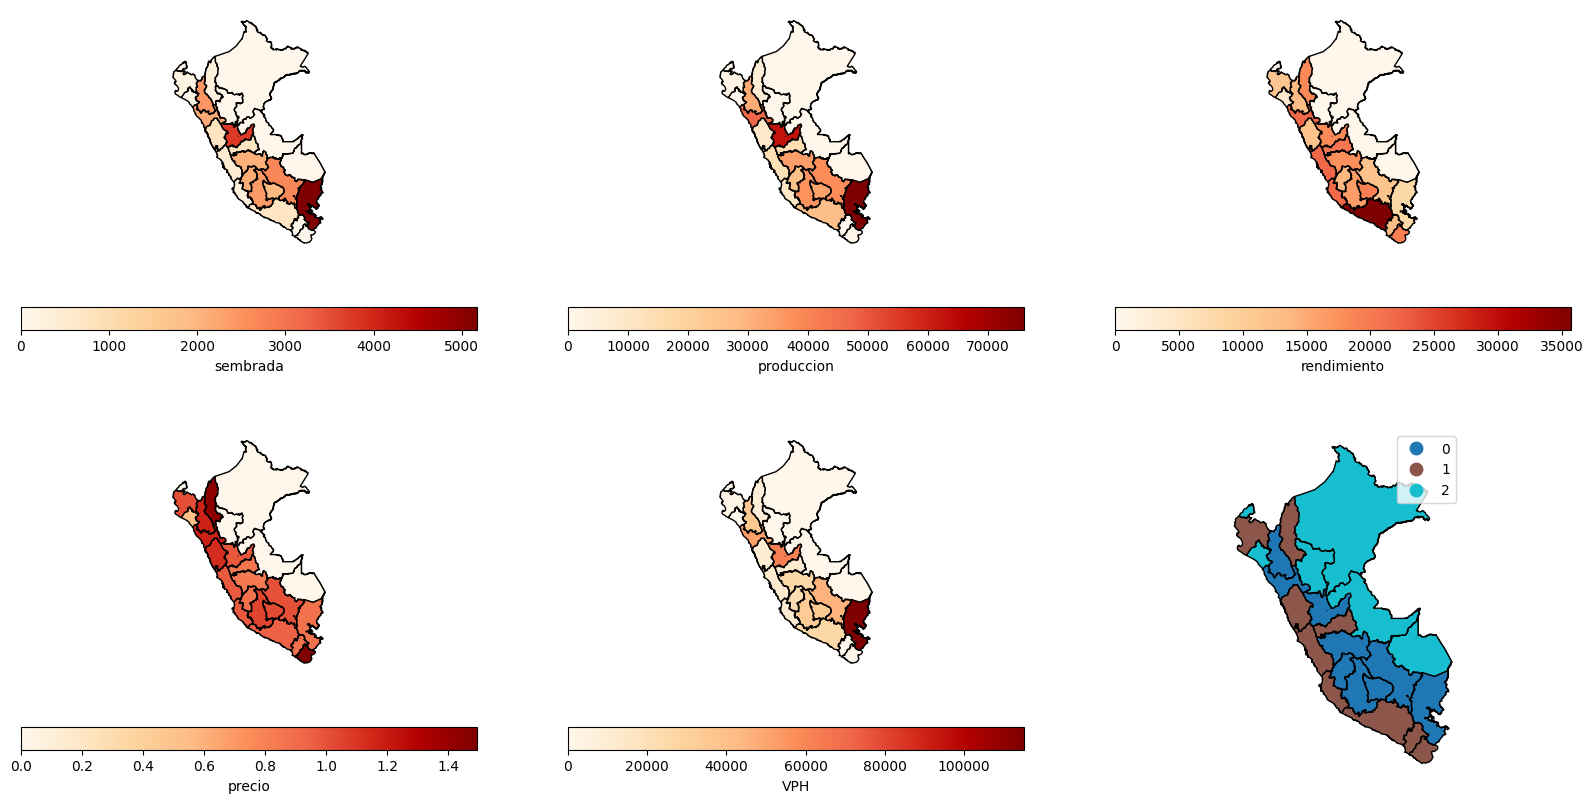

In [255]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,10))

for cat, ax in zip(['sembrada', 'produccion', 'rendimiento', 'precio', 'VPH','Cluster'], axes.ravel()): 
    ax.set_axis_off() 
    if cat == "Cluster":
        df.plot(column=cat,
                ax=ax,
                legend=True, 
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )
    else:
        df.plot(column=cat,
                ax=ax,
                linewidth=1,
                edgecolor="black",
                legend=True, 
                cmap='OrRd',
                categorical=False,
                legend_kwds={"label": cat, "orientation": "horizontal"})


In [256]:
from sklearn.mixture import GaussianMixture

In [289]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X)

In [268]:
data["gm"] = gm.predict(X)

In [297]:
mapping = {
    0: "A",
    1: "B",
    2: "C",
}

gdf["ClusterLabel"] = gdf["Cluster"].map(mapping)
gdf["gmLabel"] = gdf["gm"].map(mapping)

In [281]:
df = gdf[["NOMBDEP", 'sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'IRV', 'ClusterLabel', 'gmLabel', 'geometry']]

In [ ]:
from matplotlib.colors import ListedColormap

colors = [
    "#1f77b4",  # color for category 0
    "#ff7f0e",  # color for category 1
    "#2ca02c",  # color for category 2
]

cmap = ListedColormap(colors)

<Axes: >

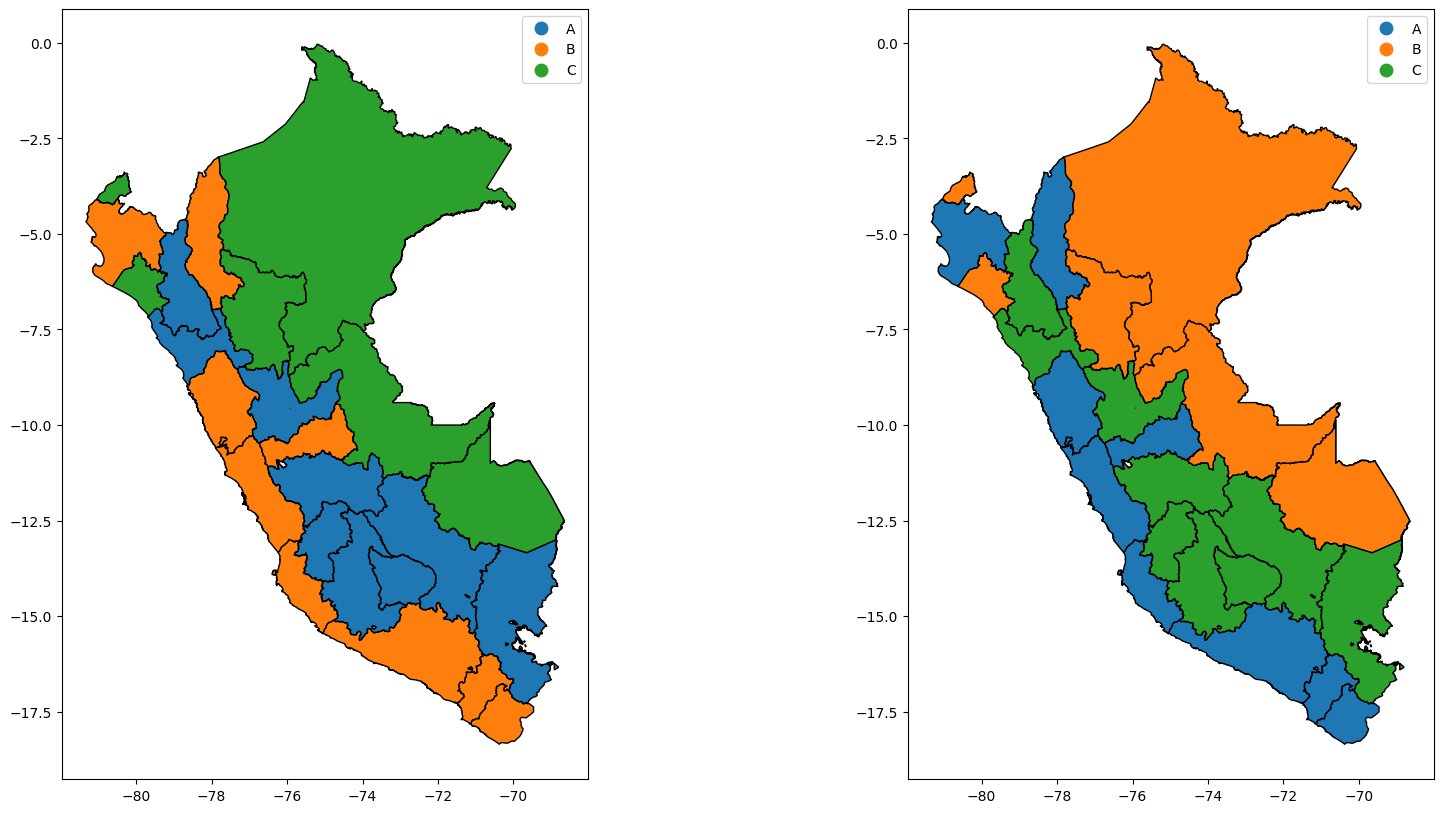

In [309]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

df.plot(column="ClusterLabel",
                ax=axes[0],
                legend=True, 
                cmap=cmap,
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )
df.plot(column="gmLabel2",
                ax=axes[1],
                legend=True, 
                cmap=cmap,
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )



In [304]:
mapping = {
    "C": "A",
    "B": "C",
    "A": "B",
}

gdf["gmLabel2"] = gdf["gmLabel"].map(mapping)

In [307]:
df = gdf[["NOMBDEP", 'sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'IRV', 'ClusterLabel', 'gmLabel2', 'geometry']]

<Axes: >

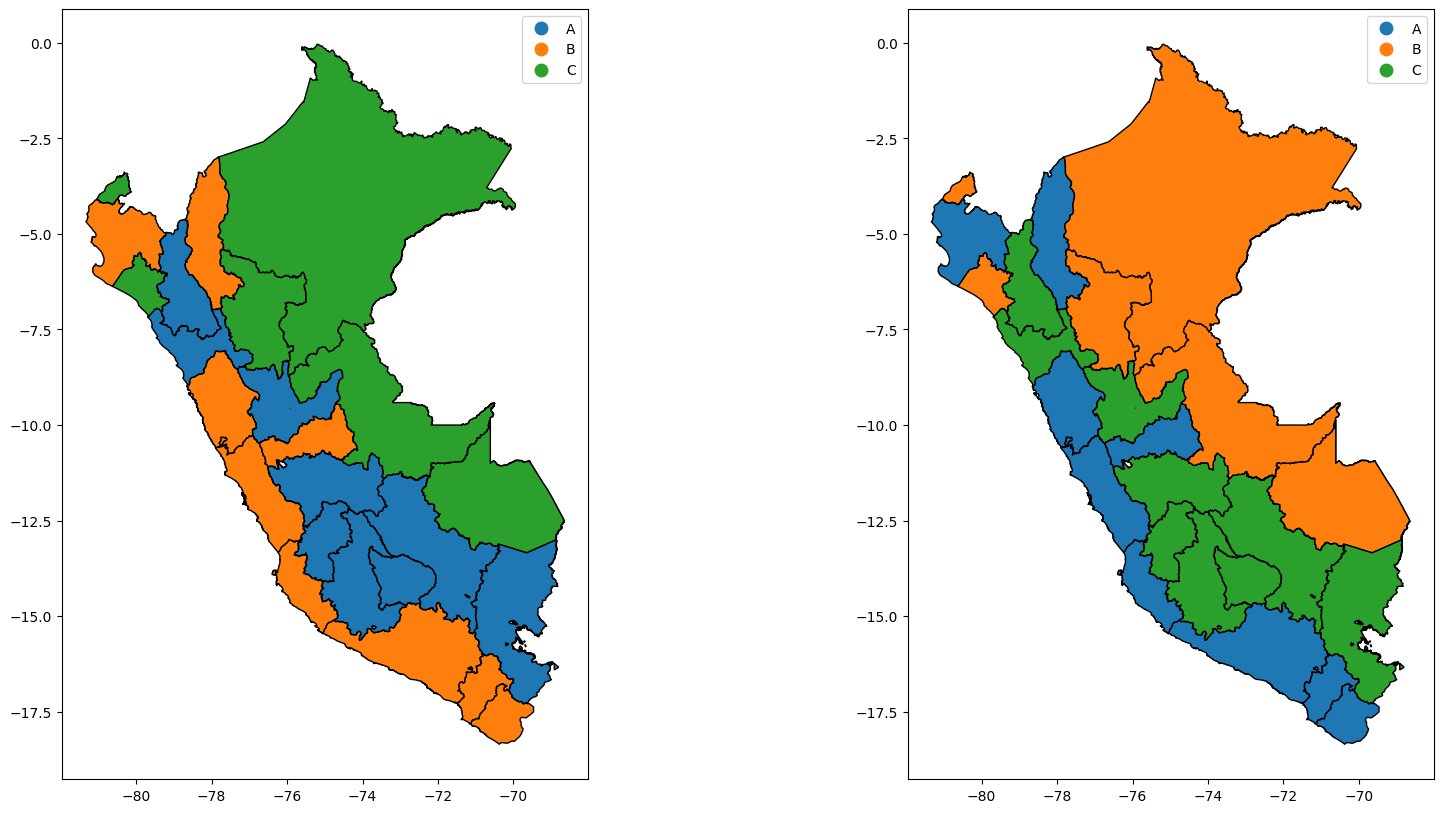

In [308]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

df.plot(column="ClusterLabel",
                ax=axes[0],
                legend=True, 
                cmap=cmap,
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )
df.plot(column="gmLabel2",
                ax=axes[1],
                legend=True, 
                cmap=cmap,
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )